# Decision tree

### 1. Import  data 

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [5]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


### 2. แบ่ง data

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x=df.drop('Kyphosis',axis=1)

In [11]:
y=df['Kyphosis']

In [12]:
xtrain, xtest, ytrain, ytest =train_test_split(x,y, test_size =0.3)

### 3. สร้าง tree

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
dtree =DecisionTreeClassifier(max_depth=2)

In [15]:
dtree.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=2)

In [16]:
from sklearn import tree

[Text(0.5, 0.8333333333333334, 'x[2] <= 8.5\ngini = 0.357\nsamples = 56\nvalue = [43, 13]'),
 Text(0.25, 0.5, 'x[0] <= 93.0\ngini = 0.48\nsamples = 15\nvalue = [6, 9]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.75, 0.5, 'x[0] <= 81.0\ngini = 0.176\nsamples = 41\nvalue = [37, 4]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 18\nvalue = [18, 0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.287\nsamples = 23\nvalue = [19, 4]')]

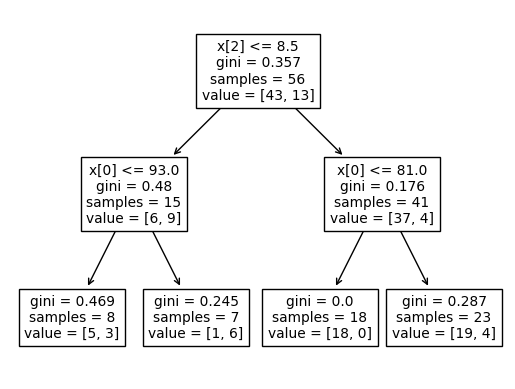

In [17]:
tree.plot_tree(dtree)

In [18]:
from sklearn.tree import export_text
r=export_text(dtree,feature_names=['age','num','start'])

In [19]:
print(r)

|--- start <= 8.50
|   |--- age <= 93.00
|   |   |--- class: absent
|   |--- age >  93.00
|   |   |--- class: present
|--- start >  8.50
|   |--- age <= 81.00
|   |   |--- class: absent
|   |--- age >  81.00
|   |   |--- class: absent



### 4. with confusion metrix

In [20]:
pred=dtree.predict(xtest)

In [21]:
ytest==pred

6      True
59     True
46     True
4      True
63     True
28     True
20     True
60     True
16     True
33     True
15     True
3      True
29     True
53     True
24    False
66     True
39    False
64     True
11     True
9     False
27     True
23    False
68     True
55     True
77     True
Name: Kyphosis, dtype: bool

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
print(confusion_matrix(ytest,pred))

[[20  1]
 [ 3  1]]


In [24]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

      absent       0.87      0.95      0.91        21
     present       0.50      0.25      0.33         4

    accuracy                           0.84        25
   macro avg       0.68      0.60      0.62        25
weighted avg       0.81      0.84      0.82        25

